In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("loan_data.csv")
loan

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0     79542.0            25000                      25000        18.49%   
1     75473.0            19750                      19750        17.27%   
2     67265.0             2100                       2100        14.33%   
3     80167.0            28000                      28000        16.29%   
4     17240.0            24250                   17431.82        12.23%   
...       ...              ...                        ...           ...   
2195  74047.0            30000                      30000        23.28%   
2196  63768.0             4200                       4200        14.33%   
2197  94545.0            19800                      19775        15.31%   
2198  53635.0            18000                      18000        20.99%   
2199  67953.0             7550                       7550        10.16%   

     Loan.Length Debt.To.Income.Ratio Home.Ownership  Monthly.Income  \
0      60 months               27.56%       MORTGAGE         8606.56   
1      60 months               13.39%       MORTGAGE         6737.50   
2      36 months                3.50%            OWN         1000.00   
3      36 months               19.62%       MORTGAGE         7083.33   
4      60 months               23.79%       MORTGAGE         5833.33   
...          ...                  ...            ...             ...   
2195   60 months               12.10%       MORTGAGE         7083.33   
2196   60 months               14.16%           RENT         3850.00   
2197   60 months               15.03%       MORTGAGE         6666.67   
2198   60 months               11.63%           RENT         9051.83   
2199   36 months                3.83%       MORTGAGE         8333.33   

     Open.CREDIT.Lines Revolving.CREDIT.Balance  \
0                   11                    15210   
1                   14                    19070   
2                   13                      893   
3                   12                    38194   
4                    6                    31061   
...                ...                      ...   
2195                16                    17969   
2196                 4                     5718   
2197                10                    46879   
2198                 5                    32394   
2199                10                    10204   

      Inquiries.in.the.Last.6.Months Employment.Length  
0                                3.0           5 years  
1                                3.0           4 years  
2                                1.0          < 1 year  
3                                1.0         10+ years  
4                                2.0         10+ years  
...                              ...               ...  
2195                             1.0         10+ years  
2196                             0.0           2 years  
2197                             3.0           6 years  
2198                             2.0           4 years  
2199                             0.0           2 years  

[2200 rows x 12 columns]

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2198 non-null   object 
 2   Amount.Funded.By.Investors      2198 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2198 non-null   object 
 5   Debt.To.Income.Ratio            2199 non-null   object 
 6   Home.Ownership                  2198 non-null   object 
 7   Monthly.Income                  2196 non-null   float64
 8   Open.CREDIT.Lines               2196 non-null   object 
 9   Revolving.CREDIT.Balance        2195 non-null   object 
 10  Inquiries.in.the.Last.6.Months  2197 non-null   float64
 11  Employment.Length               2131 non-null   object 
dtypes: float64(3), object(9)
memory us

In [4]:
loan.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Home.Ownership',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [5]:
loan.isnull().sum()

ID                                 1
Amount.Requested                   2
Amount.Funded.By.Investors         2
Interest.Rate                      0
Loan.Length                        2
Debt.To.Income.Ratio               1
Home.Ownership                     2
Monthly.Income                     4
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [6]:
loan.dropna(inplace = True)

In [7]:
remove_pert = ['Interest.Rate', 'Debt.To.Income.Ratio']

In [8]:
for col in remove_pert:
    loan[col] = loan[col].str.rstrip('%').astype(float)

In [9]:
loan['Loan.Length'] = loan['Loan.Length'].str.rstrip(' months')

In [10]:
for col in loan:
    loan = loan[loan[col] != '.']

In [11]:
loan['Loan.Length'] = loan['Loan.Length'].astype(float)

In [12]:
loan['Employment.Length'].unique()

array(['5 years', '4 years', '< 1 year', '10+ years', '2 years',
       '8 years', '1 year', '6 years', '7 years', '3 years', '9 years'],
      dtype=object)

In [13]:
mapping = {'< 1 year' : 0.5,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10.5}

In [14]:
loan['Emp.Len.Num'] = loan['Employment.Length'].map(mapping)

In [15]:
cat_col = ['Home.Ownership', 'Employment.Length']

In [16]:
df1 = loan.drop(cat_col, axis = 1)

In [17]:
for col in df1.columns:
    df1[col] = df1[col].astype(float)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2098 non-null   float64
 1   Amount.Requested                2098 non-null   float64
 2   Amount.Funded.By.Investors      2098 non-null   float64
 3   Interest.Rate                   2098 non-null   float64
 4   Loan.Length                     2098 non-null   float64
 5   Debt.To.Income.Ratio            2098 non-null   float64
 6   Monthly.Income                  2098 non-null   float64
 7   Open.CREDIT.Lines               2098 non-null   float64
 8   Revolving.CREDIT.Balance        2098 non-null   float64
 9   Inquiries.in.the.Last.6.Months  2098 non-null   float64
 10  Emp.Len.Num                     2098 non-null   float64
dtypes: float64(11)
memory usage: 196.7 KB


In [19]:
df1['ID'] = df1['ID'].astype(object)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2098 non-null   object 
 1   Amount.Requested                2098 non-null   float64
 2   Amount.Funded.By.Investors      2098 non-null   float64
 3   Interest.Rate                   2098 non-null   float64
 4   Loan.Length                     2098 non-null   float64
 5   Debt.To.Income.Ratio            2098 non-null   float64
 6   Monthly.Income                  2098 non-null   float64
 7   Open.CREDIT.Lines               2098 non-null   float64
 8   Revolving.CREDIT.Balance        2098 non-null   float64
 9   Inquiries.in.the.Last.6.Months  2098 non-null   float64
 10  Emp.Len.Num                     2098 non-null   float64
dtypes: float64(10), object(1)
memory usage: 196.7+ KB


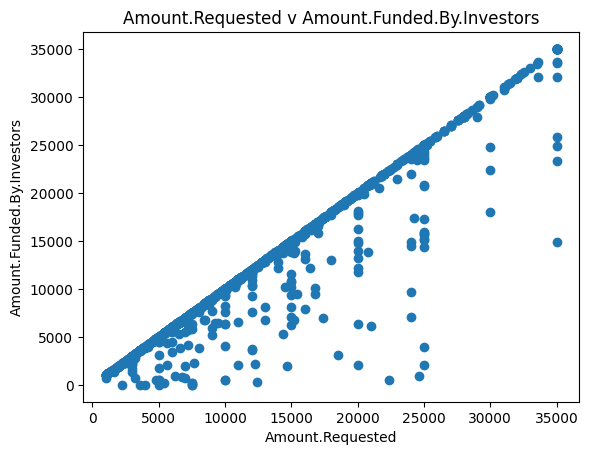

In [21]:
plt.scatter(data = df1, x = 'Amount.Requested', y = 'Amount.Funded.By.Investors')
plt.title('Amount.Requested v Amount.Funded.By.Investors')
plt.xlabel('Amount.Requested')
plt.ylabel('Amount.Funded.By.Investors')
plt.show()

<Figure size 2000x2000 with 0 Axes>

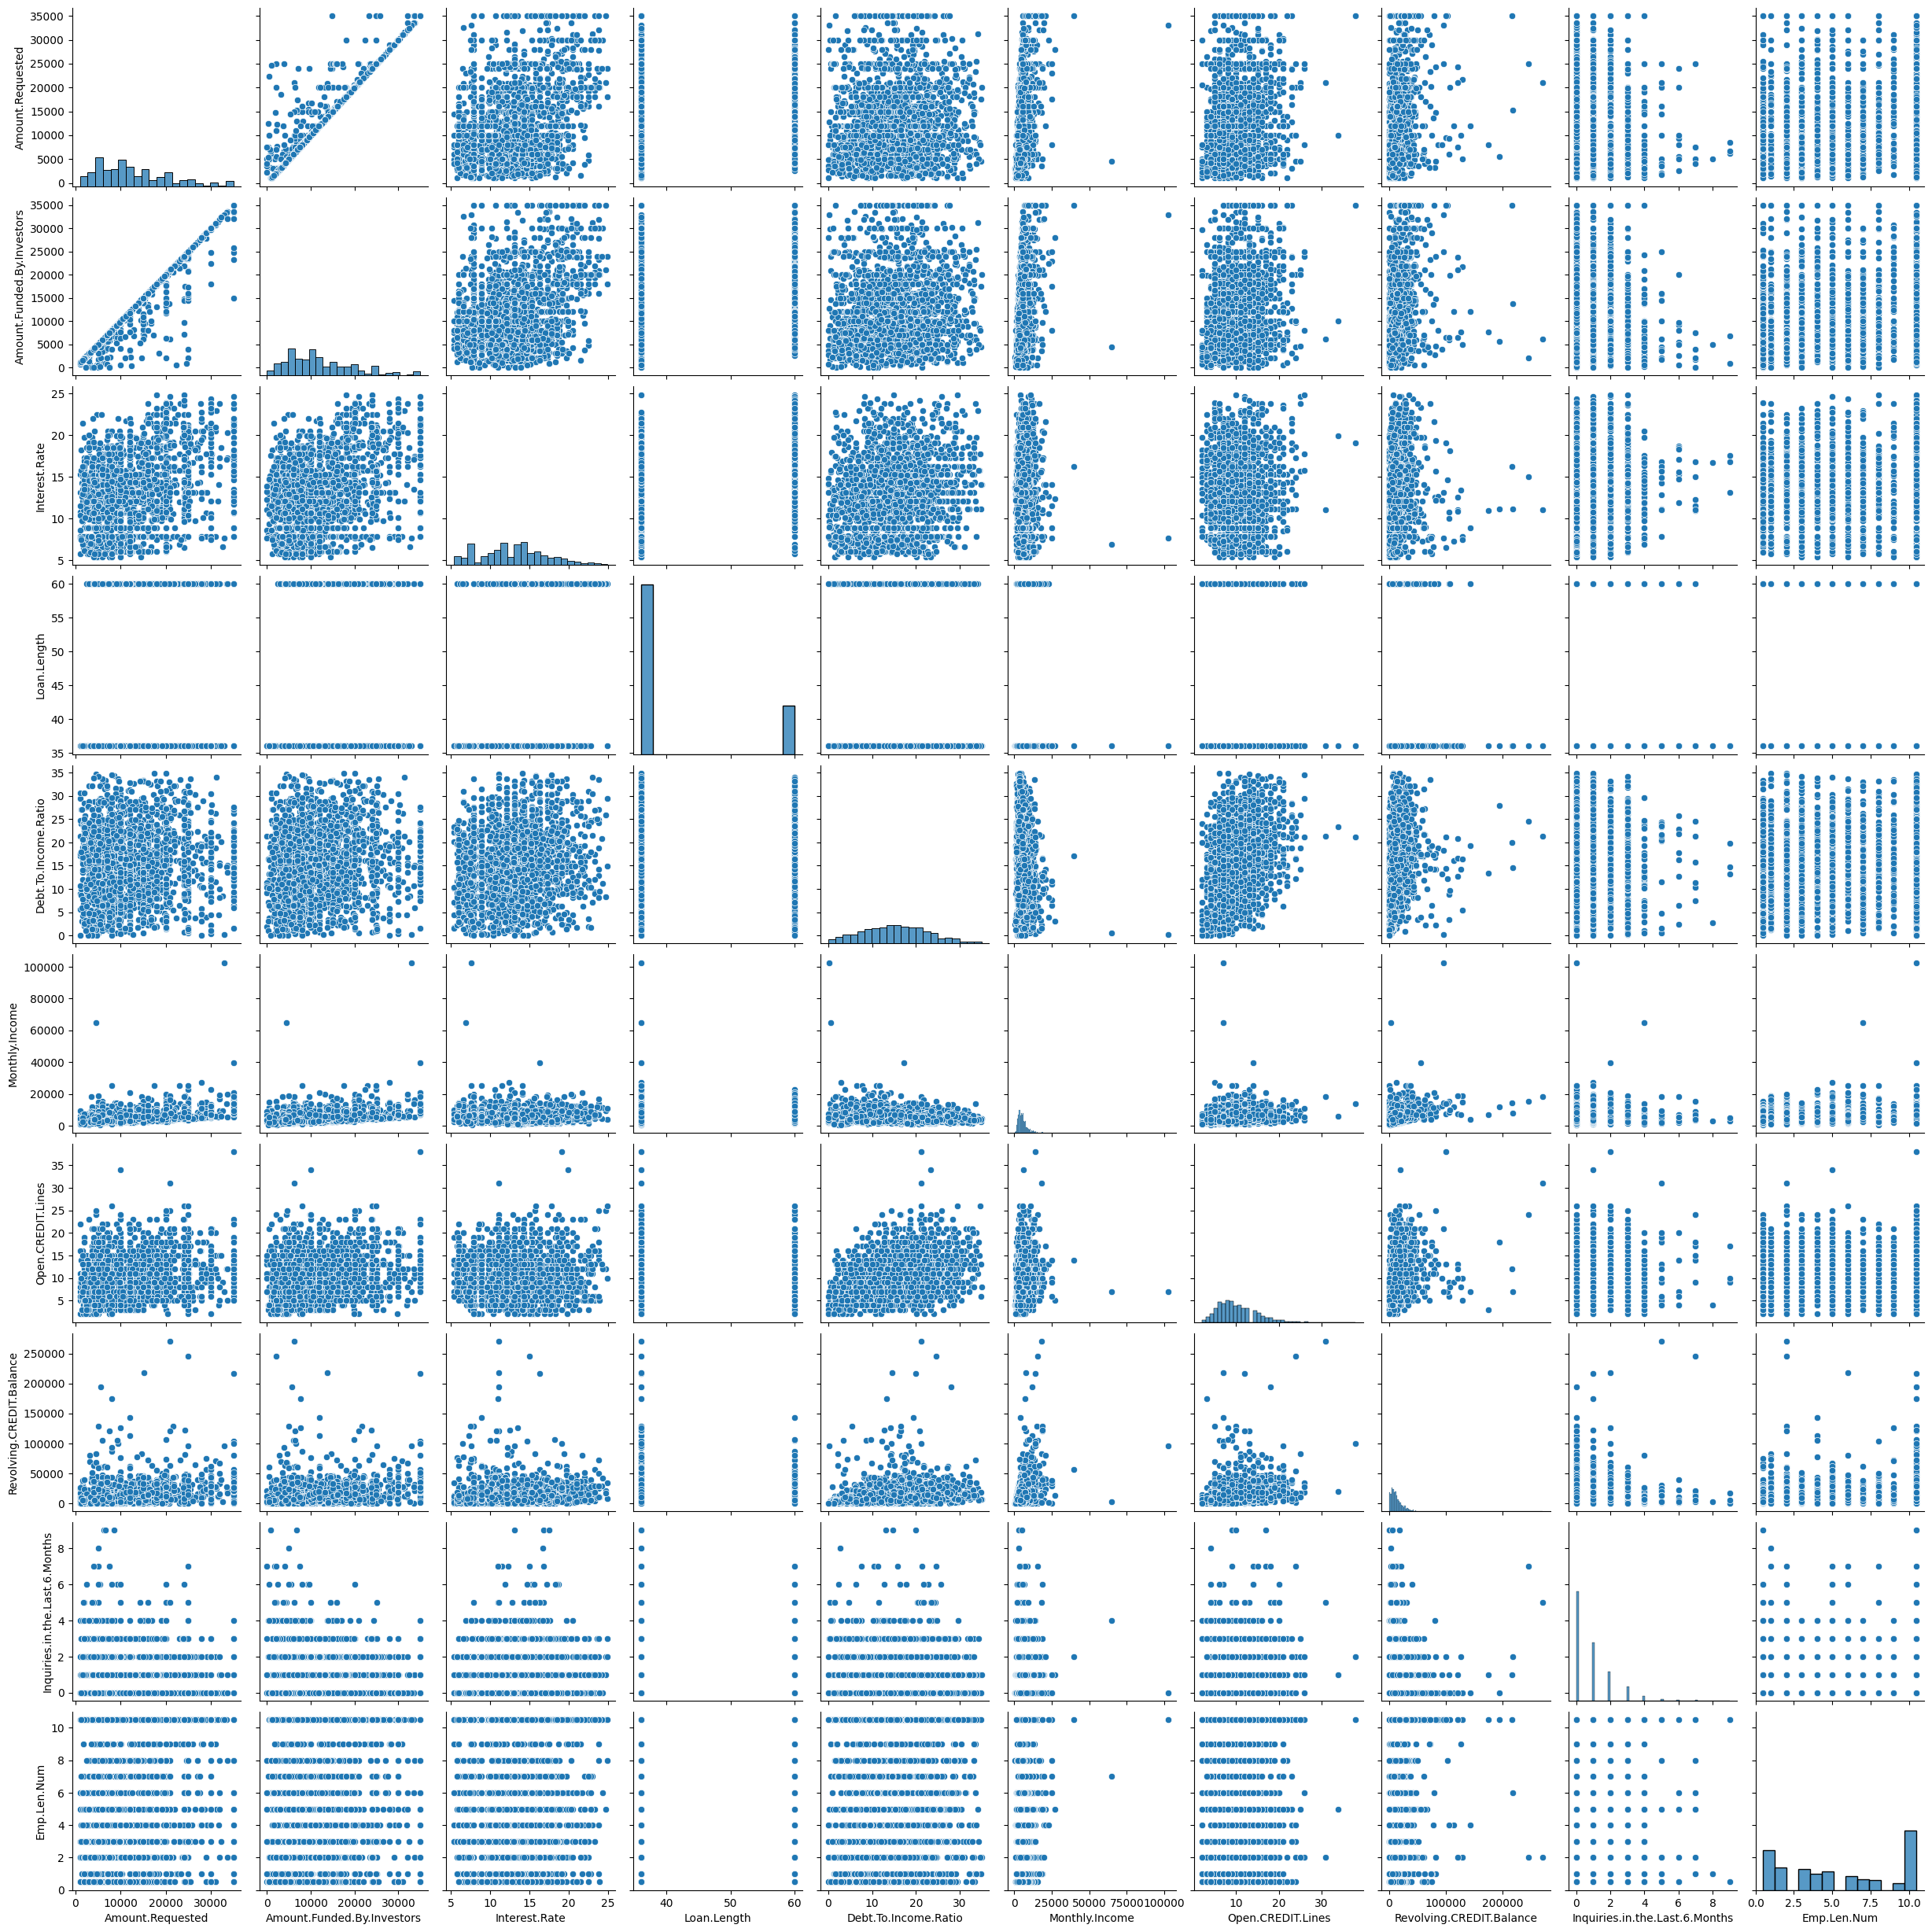

In [22]:
plt.figure(figsize = (20, 20))
sns.pairplot(df1.select_dtypes(include = 'float64'))
plt.show()

In [23]:
df1.corr()

ID  Amount.Requested  \
ID                              1.000000          0.120701   
Amount.Requested                0.120701          1.000000   
Amount.Funded.By.Investors      0.161023          0.969000   
Interest.Rate                   0.249147          0.331254   
Loan.Length                    -0.051392          0.408053   
Debt.To.Income.Ratio            0.236469          0.078049   
Monthly.Income                 -0.001875          0.378157   
Open.CREDIT.Lines               0.185063          0.187765   
Revolving.CREDIT.Balance        0.078928          0.289516   
Inquiries.in.the.Last.6.Months  0.143567         -0.021149   
Emp.Len.Num                     0.080724          0.161010   

                                Amount.Funded.By.Investors  Interest.Rate  \
ID                                                0.161023       0.249147   
Amount.Requested                                  0.969000       0.331254   
Amount.Funded.By.Investors                        1.000000       0.334154   
Interest.Rate                                     0.334154       1.000000   
Loan.Length                                       0.397952       0.427418   
Debt.To.Income.Ratio                              0.089566       0.182624   
Monthly.Income                                    0.362218       0.003635   
Open.CREDIT.Lines                                 0.180750       0.095903   
Revolving.CREDIT.Balance                          0.254513       0.067141   
Inquiries.in.the.Last.6.Months                   -0.063488       0.169196   
Emp.Len.Num                                       0.165448       0.042206   

                                Loan.Length  Debt.To.Income.Ratio  \
ID                                -0.051392              0.236469   
Amount.Requested                   0.408053              0.078049   
Amount.Funded.By.Investors         0.397952              0.089566   
Interest.Rate                      0.427418              0.182624   
Loan.Length                        1.000000              0.036171   
Debt.To.Income.Ratio               0.036171              1.000000   
Monthly.Income                     0.063514             -0.172039   
Open.CREDIT.Lines                  0.041507              0.374095   
Revolving.CREDIT.Balance           0.054441              0.175452   
Inquiries.in.the.Last.6.Months     0.041767              0.010882   
Emp.Len.Num                        0.065999              0.047974   

                                Monthly.Income  Open.CREDIT.Lines  \
ID                                   -0.001875           0.185063   
Amount.Requested                      0.378157           0.187765   
Amount.Funded.By.Investors            0.362218           0.180750   
Interest.Rate                         0.003635           0.095903   
Loan.Length                           0.063514           0.041507   
Debt.To.Income.Ratio                 -0.172039           0.374095   
Monthly.Income                        1.000000           0.160565   
Open.CREDIT.Lines                     0.160565           1.000000   
Revolving.CREDIT.Balance              0.358915           0.280001   
Inquiries.in.the.Last.6.Months        0.031142           0.110553   
Emp.Len.Num                           0.104701           0.077727   

                                Revolving.CREDIT.Balance  \
ID                                              0.078928   
Amount.Requested                                0.289516   
Amount.Funded.By.Investors                      0.254513   
Interest.Rate                                   0.067141   
Loan.Length                                     0.054441   
Debt.To.Income.Ratio                            0.175452   
Monthly.Income                                  0.358915   
Open.CREDIT.Lines                               0.280001   
Revolving.CREDIT.Balance                        1.000000   
Inquiries.in.the.Last.6.Months                  0.026248   
Emp.Len.Num                                     0.

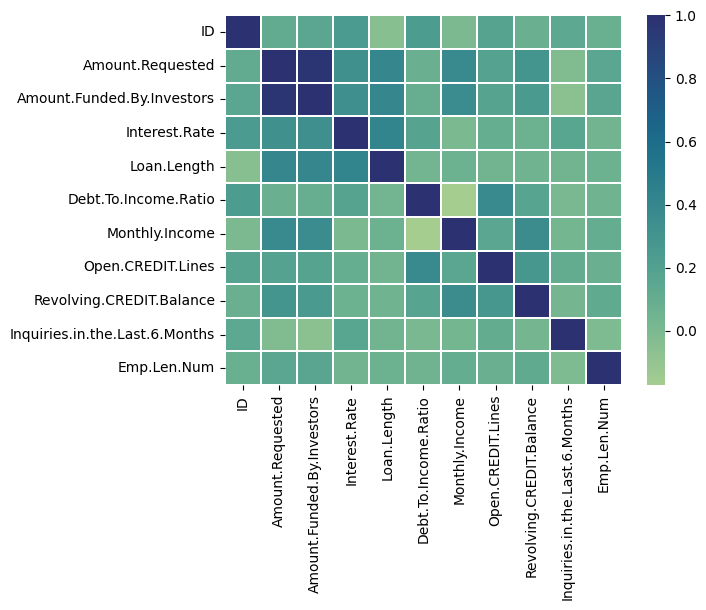

In [24]:
sns.heatmap(df1.corr(), cmap = 'crest', linewidth = 0.1)
plt.show()